# Matplotlib - Bar charts and analyzing data from CSVs

## Table of contents

* [Creating the first bar plot: `plt.bar()`](#Creating-the-first-bar-plot:-plt.bar())
* [Plotting multiple bar plots on the same graph](#Plotting-multiple-bar-plots-on-the-same-graph)
* [Creating a horizontal bar plot from data imported from a CSV file: `plt.barh(<y-data>, <x-data>)`](#Creating-a-horizontal-bar-plot-from-data-imported-from-a-CSV-file:-plt.barh(<y-data>,-<x-data>))
    * [Using `csv.DictReader()` class, `collections.Counter()` class and `collections.Counter.most_common()` method](#Using-csv.DictReader()-class,-collections.Counter()-class-and-collections.Counter.most_common()-method)
    * [Using `pd.read_csv()` method, `collections.Counter()` class and `collections.Counter.most_common()` method](#Using-pd.read_csv()-method,-collections.Counter()-class-and-collections.Counter.most_common()-method)

***

In [66]:
from matplotlib import pyplot as plt

In [67]:
plt.ion()               # turn the interactive mode ON, so we do not have to run plt.show()

In [68]:
# developer age list
age_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

# median developer salaries by age
dev_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]

# median python developer salaries by age
py_dev_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]

# median javascript developer salaries by age
js_dev_y = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]

## Creating the first bar plot: `plt.bar()`

`plt.bar()` is used to make bar plots.

`plt.bar()` API: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar

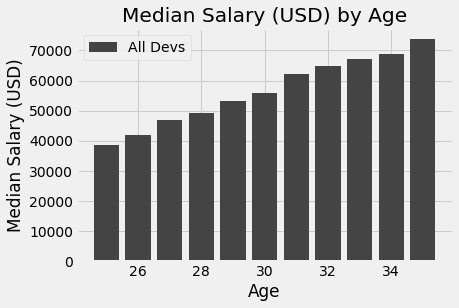

In [69]:
plt.style.use('fivethirtyeight')
plt.bar(age_x, dev_y, color='#444444', label='All Devs')

plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')
plt.legend()

## Plotting multiple bar plots on the same graph

If we plot all 3 datasets as bar plots together, just the way you would for line plots (`plt.plot()`), you would notice that the bar plots are **layered on top of each other**, which is not what we want.

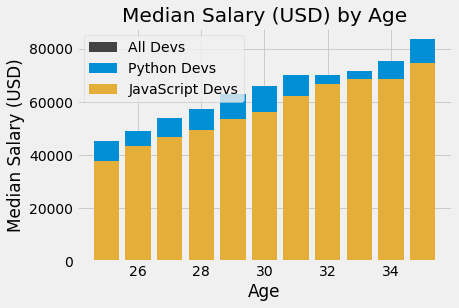

In [70]:
plt.style.use('fivethirtyeight')
plt.bar(age_x, dev_y, color='#444444', label='All Devs')
plt.bar(age_x, py_dev_y, color='#008fd5', label='Python Devs')
plt.bar(age_x, js_dev_y, color='#e5ae38', label='JavaScript Devs')

plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')
plt.legend()

To have the bar plots for each dataset **side-by-side** on the same graph, we need to use a workaround as follows:

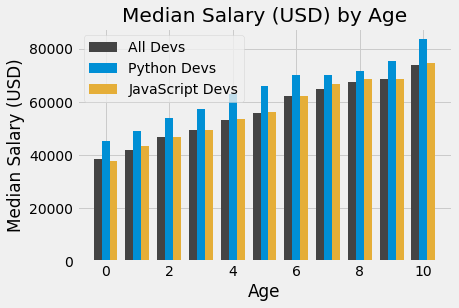

In [71]:
import numpy as np

x_indexes = np.arange(len(age_x))               # create a 1D array of 'age_x' list indexes
bar_width = 0.25                                # set bar widths to 0.25 (default is 0.8)

plt.style.use('fivethirtyeight')
plt.bar(x_indexes - bar_width, dev_y, width=bar_width, color='#444444', label='All Devs')       # offset x by 1 bar width
plt.bar(x_indexes, py_dev_y, width=bar_width, color='#008fd5', label='Python Devs')
plt.bar(x_indexes + bar_width, js_dev_y, width=bar_width, color='#e5ae38', label='JavaScript Devs')    # offset x by 1 bar width

plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')
plt.legend()

Note: The bar plot above looks 'almost' fine, except that the x-axis labels are now `x_indexes`. We can change the x-axis labels using:<br> `plt.xticks(ticks=<ticks_source>, labels=<labels_source>)`

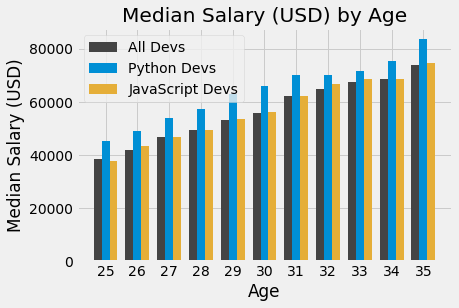

In [72]:
import numpy as np

x_indexes = np.arange(len(age_x))
bar_width = 0.25

plt.style.use('fivethirtyeight')
plt.bar(x_indexes - bar_width, dev_y, width=bar_width, color='#444444', label='All Devs')
plt.bar(x_indexes, py_dev_y, width=bar_width, color='#008fd5', label='Python Devs')
plt.bar(x_indexes + bar_width, js_dev_y, width=bar_width, color='#e5ae38', label='JavaScript Devs')

plt.xticks(ticks=x_indexes, labels=age_x)                      # to re-assign x-axis labels
plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')
plt.legend()

## Creating a horizontal bar plot from data imported from a CSV file: `plt.barh(<y-data>, <x-data>)`

Let's say that we want to 
1. Import a CSV file that contains responses for programming languages used by respondent developers, and
2. Make a bar plot for the most commonly used programming languages.

This could be done in two ways:
- Using  `csv.DictReader()` class, `collections.Counter()` class and `collections.Counter.most_common()` method , OR
- Using  `pd.read_csv()` method, `collections.Counter()` class and `collections.Counter.most_common()` method (This is the preferred method).

Let's look at both these methods below.

### Using `csv.DictReader()` class, `collections.Counter()` class and `collections.Counter.most_common()` method

To review the `csv` module and the `csv.DictReader()` class, have a look at `22a_csv_module.py` in the `pybook` directory.

In [73]:
import csv

The `csv.DictReader()` class maps the information in each row to an ordered dictionary (`OrderedDict` object).

In [74]:
with open('work_directory/matplotlib/code_snippets/02-BarCharts/data.csv', 'r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file)        # csv.DictReader() creates a an instance of the 'csv.DictReader' class
    
    # view the first row
    row = next(csv_reader)
    print(row)

OrderedDict([('Responder_id', '1'), ('LanguagesWorkedWith', 'HTML/CSS;Java;JavaScript;Python')])


In [75]:
    print(row['LanguagesWorkedWith'])

HTML/CSS;Java;JavaScript;Python


In [76]:
    print(row['LanguagesWorkedWith'].split(';'))

['HTML/CSS', 'Java', 'JavaScript', 'Python']


Now, we need to iterate over the **values** for the `LanguagesWorkedWith` **key** for each entry in the **ordered dictionary iterator** created by `csv.DictReader()` class.

To do this, we will use the `collections.Counter()` class. A `Counter` is a `dict` subclass for counting hashable objects. It is an unordered collection where *elements* are stored as dictionary *keys* and their *counts* are stored as dictionary *values*.

To read the documentation of `collections` library, go to: https://docs.python.org/2/library/collections.html

In [77]:
from collections import Counter

with open('work_directory/matplotlib/code_snippets/02-BarCharts/data.csv', 'r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file)        # csv.DictReader() creates a an instance of the 'csv.DictReader' class
    
    lang_counter = Counter()                     # creates a new, empty collections.Counter object
    
    for line in csv_reader:
        lang_counter.update(line['LanguagesWorkedWith'].split(';'))        # updates the collections.Counter object
    
print(lang_counter)                              # prints the collections.Counter object

Counter({'JavaScript': 59219, 'HTML/CSS': 55466, 'SQL': 47544, 'Python': 36443, 'Java': 35917, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})


In [78]:
type(lang_counter)

collections.Counter

The `collections.Counter.most_common(<n>)` method returns a `list` of `tuples` containing the `<n>` most common elements and their counts, from the most common to the least.

In [79]:
print(lang_counter.most_common(15))

[('JavaScript', 59219), ('HTML/CSS', 55466), ('SQL', 47544), ('Python', 36443), ('Java', 35917), ('Bash/Shell/PowerShell', 31991), ('C#', 27097), ('PHP', 23030), ('C++', 20524), ('TypeScript', 18523), ('C', 18017), ('Other(s):', 7920), ('Ruby', 7331), ('Go', 7201), ('Assembly', 5833)]


Now we can use `map()` function, alongwith the `zip()` function and the unpacking operator, `*`, to UNZIP the `list` of `tuples` above into two separate `lists`.

In [80]:
languages, popularity = map(list, zip(*lang_counter.most_common(15)))

If you do not understand what the above line of code is doing, have a look at `8_range_enumerate_zip_functions.py` in the `pybook` directory.

In [81]:
languages

['JavaScript',
 'HTML/CSS',
 'SQL',
 'Python',
 'Java',
 'Bash/Shell/PowerShell',
 'C#',
 'PHP',
 'C++',
 'TypeScript',
 'C',
 'Other(s):',
 'Ruby',
 'Go',
 'Assembly']

In [82]:
popularity

[59219,
 55466,
 47544,
 36443,
 35917,
 31991,
 27097,
 23030,
 20524,
 18523,
 18017,
 7920,
 7331,
 7201,
 5833]

Now let's create the horizontal bar plot using `plt.barh(<y-data>, <x-data>)`:

Text(0.5, 0, 'Number of users')

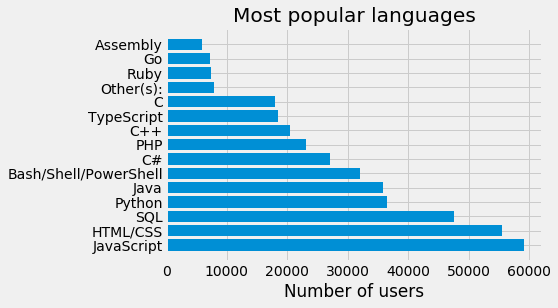

In [83]:
plt.barh(languages, popularity)                                # plt.barh() used instead of plt.bar()
plt.title("Most popular languages")
# plt.ylabel("Programming languages")                          # this label is redundant
plt.xlabel("Number of users")

Text(0.5, 0, 'Number of users')

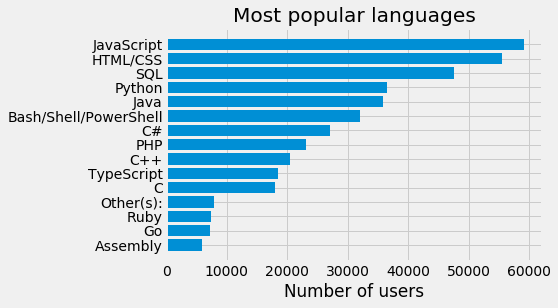

In [84]:
languages.reverse()                                            # .reverse() method reverses the lists in-place
popularity.reverse()

plt.barh(languages, popularity)
plt.title("Most popular languages")
# plt.ylabel("Programming languages")
plt.xlabel("Number of users")

For clarity, let's put **all the code above in one cell**:

Text(0.5, 0, 'Number of users')

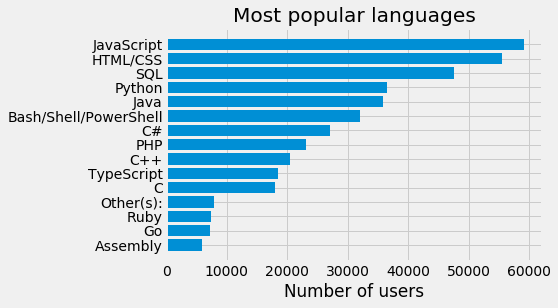

In [85]:
import csv
from collections import Counter

with open('work_directory/matplotlib/code_snippets/02-BarCharts/data.csv', 'r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file)        # csv.DictReader() creates a an instance of the 'csv.DictReader' class
    
    lang_counter = Counter()                     # creates a new, empty collections.Counter object
    
    for line in csv_reader:
        lang_counter.update(line['LanguagesWorkedWith'].split(';'))         # updates the collections.Counter object
        
# unzip list of tuples, returned from .most_common() method, into 2 lists
languages, popularity = map(list, zip(*lang_counter.most_common(15)))

languages.reverse()                              # .reverse() method reverses the lists in-place
popularity.reverse()

plt.style.use('fivethirtyeight')

plt.barh(languages, popularity)                  # plt.barh() used instead of plt.bar()
plt.title("Most popular languages")
# plt.ylabel("Programming languages")
plt.xlabel("Number of users")

### Using `pd.read_csv()` method, `collections.Counter()` class and `collections.Counter.most_common()` method

This is the preferred method.

In [86]:
import pandas as pd
from collections import Counter

df = pd.read_csv('work_directory/matplotlib/code_snippets/02-BarCharts/data.csv', index_col='Responder_id')
df.head()

,LanguagesWorkedWith
Responder_id,
1,HTML/CSS;Java;JavaScript;Python
2,C++;HTML/CSS;Python
3,HTML/CSS
4,C;C++;C#;Python;SQL
5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


Text(0.5, 0, 'Number of users')

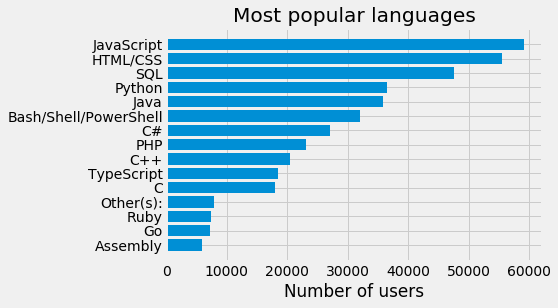

In [87]:
lang_counter = Counter()                         # creates a new, empty collections.Counter object
    
for item in df['LanguagesWorkedWith']:
    lang_counter.update(item.split(';'))         # updates the collections.Counter object
        
# unzip list of tuples, returned from .most_common() method, into 2 lists
languages, popularity = map(list, zip(*lang_counter.most_common(15)))

languages.reverse()                              # .reverse() method reverses the lists in-place
popularity.reverse()

plt.style.use('fivethirtyeight')

plt.barh(languages, popularity)                  # plt.barh() used instead of plt.bar()
plt.title("Most popular languages")
# plt.ylabel("Programming languages")
plt.xlabel("Number of users")